In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import collections
from wordcloud import WordCloud
from PIL import Image

In [17]:
tweet_df_location = pd.read_csv('../data/graphAnalysis/clean_climateTwitterData.csv')
tweet_df_location.columns

Index(['Unnamed: 0', 'id', 'author_id', 'text', 'retweets', 'permalink',
       'date', 'formatted_date', 'favorites', 'mentions', 'hashtags', 'geo',
       'urls', 'search_hashtags', 'location', 'text_clean',
       'tb_sentiment_polarity', 'tb_sentiment_subjectivity',
       'textBlob_sentiment', 'vader_compound', 'vader_pos', 'vader_neg',
       'vader_neu', 'V_Sentiment'],
      dtype='object')

In [18]:
hashtags =[]
hashtag_pattern = re.compile(r"#[a-zA-Z]+")
hashtag_matches = list(tweet_df_location['text'].apply(hashtag_pattern.findall))

hashtag_dict = {}
for match in hashtag_matches:
    for singlematch in match:
        singlematchLower = singlematch.lower()
        if singlematchLower not in hashtag_dict.keys():
            hashtag_dict[singlematchLower] = 1
        else:
            hashtag_dict[singlematchLower] = hashtag_dict[singlematchLower]+1
            

In [19]:
#Making ordered list
hashtag_ordered_list = sorted(hashtag_dict.items(), key=lambda x:x[1])
hashtag_ordered_list = hashtag_ordered_list[::-1]

#seperating the hashtags and their values into two diff list
hashtag_ordered_values =[]
hashtag_ordered_keys = []
#Pick top 20
for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_values.append(item[1])
    hashtag_ordered_keys.append(item[0])
hashtag_ordered_keys    

['#climatechange',
 '#climatestrike',
 '#climateaction',
 '#climatecrisis',
 '#sustainability',
 '#fridaysforfuture',
 '#environment',
 '#greennewdeal',
 '#globalwarming',
 '#climateemergency',
 '#actonclimate',
 '#savetheplanet',
 '#climatechangeisreal',
 '#climateactionnow',
 '#climate',
 '#auspol',
 '#gretathunberg',
 '#schoolstrike',
 '#bushfires',
 '#nature']

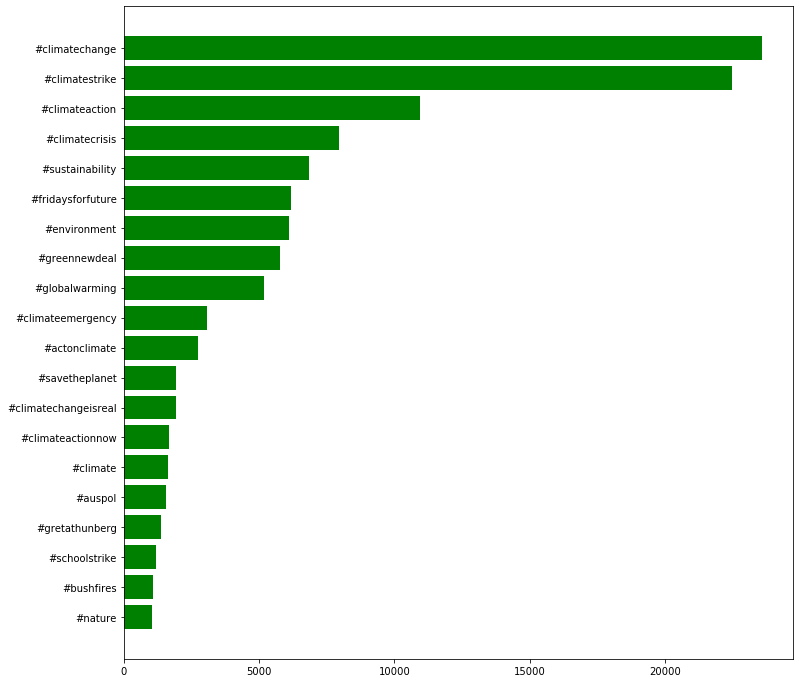

In [20]:
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(hashtag_ordered_keys))
ax.barh(y_pos,list(hashtag_ordered_values)[::-1],align="center",color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(list(hashtag_ordered_keys)[::-1])
plt.savefig("../data/graphAnalysis/wordcloud/hashtag_frequency_barchart.png")
plt.show()


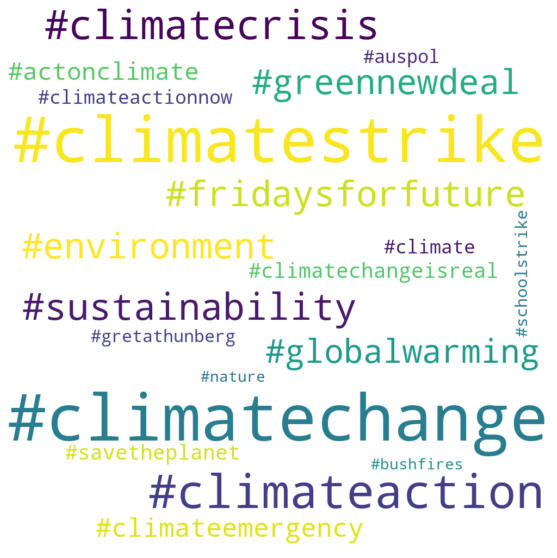

In [21]:
# d = 'masks/masks-wordclouds/'
# comments_mask = np.array(Image.open(d + 'upvote.png'))

hashtag_ordered_dict = {}
for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_dict[item[0]] = item[1]
wordcloud = WordCloud(width=1000,height=1000, random_state=21, max_font_size=200, background_color=
                      'white').generate_from_frequencies(hashtag_ordered_dict)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig("../data/graphAnalysis/wordcloud/hashtag_frequency_wordcloud.png")
plt.show()

In [22]:
#mentions
mentions =[]
mentions_pattern = re.compile(r"@[a-zA-Z_]+")
mentions_matches = list(tweet_df_location['text'].apply(mentions_pattern.findall))

mentions_dict = {}
for match in mentions_matches:
    for singlematch in match:
        if singlematch not in mentions_dict.keys():
            mentions_dict[singlematch] = 1
        else:
            mentions_dict[singlematch] = mentions_dict[singlematch]+1

In [8]:
#Making ordered list
mentions_ordered_list = sorted(mentions_dict.items(), key=lambda x:x[1])
mentions_ordered_list = mentions_ordered_list[::-1]

#seperating the hashtags and their values into two diff list
mentions_ordered_values =[]
mentions_ordered_keys = []
#Pick top 20
for item in mentions_ordered_list[0:20]:
    mentions_ordered_values.append(item[1])
    mentions_ordered_keys.append(item[0])
    
mentions_ordered_keys   

['@GretaThunberg',
 '@AOC',
 '@UN',
 '@sunrisemvmt',
 '@realDonaldTrump',
 '@ScottMorrisonMP',
 '@BernieSanders',
 '@ExtinctionR',
 '@Janefonda',
 '@narendramodi',
 '@UNFCCC',
 '@PMOIndia',
 '@AlexandriaV',
 '@ClimateReality',
 '@RedTapeMovement',
 '@Fridays',
 '@antonioguterres',
 '@sejorg',
 '@YouTube',
 '@UNEnvironment']

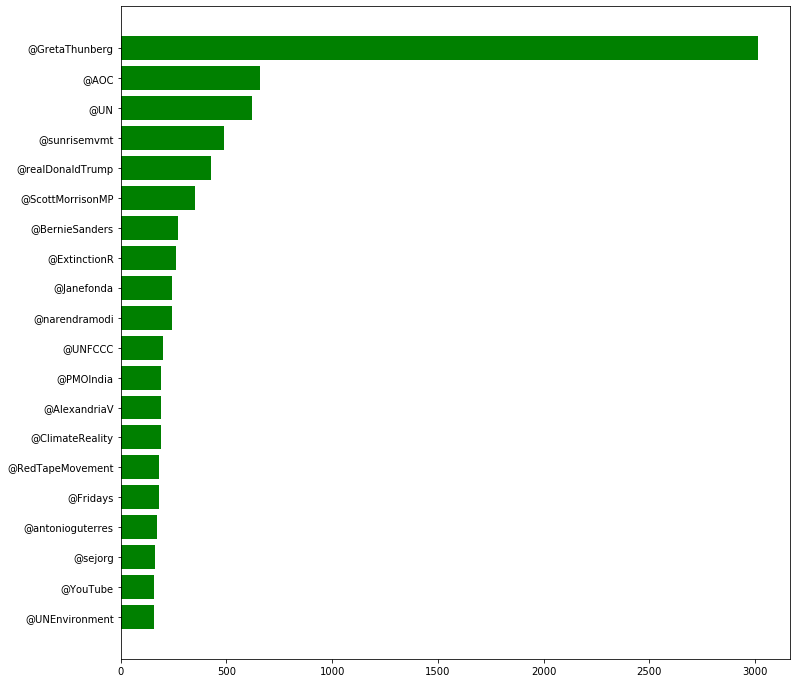

In [23]:
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(mentions_ordered_keys))
ax.barh(y_pos,list(mentions_ordered_values)[::-1],align="center",color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(list(mentions_ordered_keys)[::-1])
plt.savefig("../data/graphAnalysis/wordcloud/handle_frequency_barchart.png")
plt.show()

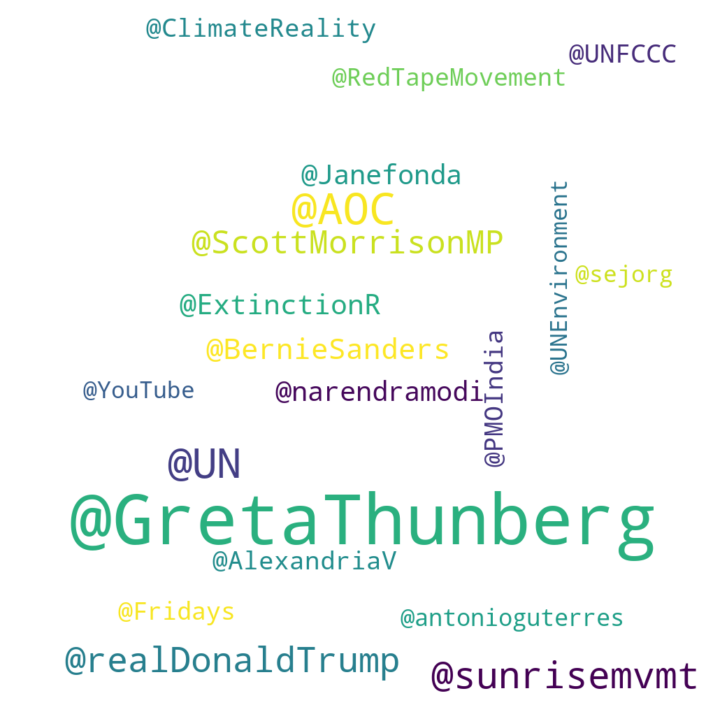

In [10]:
# d = 'masks/masks-wordclouds/'
# comments_mask = np.array(Image.open(d + 'twitter_mask.png'))


mentions_ordered_dict = {}
for item in mentions_ordered_list[0:20]:
    mentions_ordered_dict[item[0]] = item[1]
wordcloud = WordCloud(width=1000,height=1000, random_state=21, max_font_size=100, background_color=
                      'white').generate_from_frequencies(mentions_ordered_dict)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout()  
plt.savefig("../data/graphAnalysis/wordcloud/handle_frequency_wordcloud.png")
plt.show()


In [11]:
tweet_df = tweet_df_location[tweet_df_location['text'].str.contains("@AOC")]
len(tweet_df)

658

In [12]:
tweet_df_pos = tweet_df[tweet_df['V_Sentiment']== "Positive"]
len(tweet_df_pos)

384

In [13]:
tweet_df_pos.to_csv("../data/graphAnalysis/wordcloud/handle_AOC_Positive.csv")

In [14]:
tweet_df_neg = tweet_df[tweet_df['V_Sentiment']== "Negative"]
len(tweet_df_neg)

142

In [15]:
tweet_df_neg.to_csv("../data/graphAnalysis/wordcloud/handle_AOC_Negative.csv")